# Model complexity

So far, we have discussed only models for which the starting point of the forecast was always given in the form of the linear regression line. Especially for linear regression this assumption seems to be very restrictive, since it can be assumed that in reality the relationships may be more complex. As an example, consider the marginal benefit of additional advertising and its influence on a company's sales. In order to be able to represent more complex interrelationships, there are different possibilities. With respect to linear regression, the independent variables can be transformed in a non-linear way. We will look at this in the next section using polynomial regression. Note, this is just an example and many more possibilities exist to capture more flexible relationships between feature variables and the target. Further examples are given by the use of splines in regression or by other models like regression trees or neural networks. 

Regardless of the model choice, however, it is usually the case that more complex models are more difficult to train. While the performance of the models for training data usually increases quickly, it may be that at the same time the results for the test data become worse. This phenomenon is called overfitting and describes the fact that the model becomes too specific to the training data, making it less good at identifying general relationships. As a result, performance is often worse for new data. It is also compounded by the fact that the variability of more complex models is often greater. This means that predictions differ significantly more when other data are taken from a sample and used to train the model. On the other hand, overly simplistic models, such as the linear regression model, often have the problem that they cannot represent the true relationship and therefore the prediction is systematically biased. This is referred to as a bias which is a systematic deviation of predictions from true values. When training models, it is important to find a good compromise between these opposing effects. In order to be able to consider this more closely, we first need the possibility to fall back on a more complex model. Polynomial regression will serve as an example for this, which we will now take a look at. 

## More Flexible Models - Polynomial Regression

In polynomial regression, exponentiated forms of independent variables up to the degree $q$ are included in the linear regression model. That means for a linear single regression the regression model becomes:

$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + ... + \beta_q x^q + \epsilon =  \epsilon
$$

The graph in the lower cell illustrates that non-linear relationships can also be mapped in this way. 

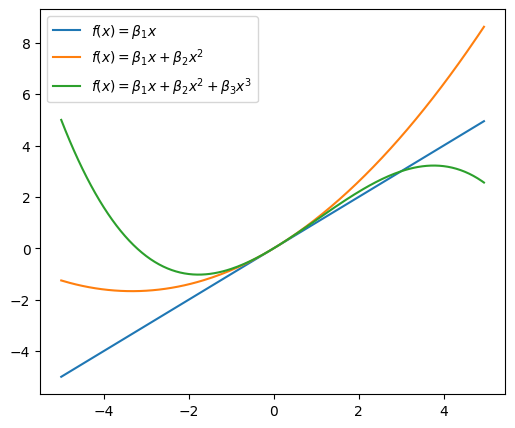

In [1]:
import numpy as np
import matplotlib.pylab as plt


x = np.arange(-5, 5, 0.05)
poly_one = lambda x: x
poly_two = lambda x: x + 0.15 * x**2
poly_three = lambda x: x + 0.15 * x**2 - 0.05*x**3

fig, ax = plt.subplots(figsize = (6, 5))
ax.plot(x, poly_one(x), label = r"$f(x) = \beta_1 x$")
ax.plot(x, poly_two(x), label = r"$f(x) = \beta_1 x + \beta_2 x^2$")
ax.plot(x, poly_three(x), label = r"$f(x) = \beta_1 x + \beta_2 x^2 + \beta_3 x^3$")
ax.legend()
plt.show()

However, the degree of the polynomial must be specified by the user. If we have several independent variables in the model, we need to make this decision for each of the variables. This quickly increases the flexibility of the model and its number of parameters at the same time. Moreover, for the reasons mentioned above, it is not always good to increase the complexity of the model too much by including high degree polynomials. For a better understanding, let's consider a simple and artificially generated example. 

We assume that the true relationship between $x$ and $y$ is given by: 

$$
y = \cos(1.5 \pi x) + \epsilon
$$

In the lower cell, we can see well that a linear model will not be able to adequately represent this relationship due to the non-linear relationship between $x$ and $y$.  

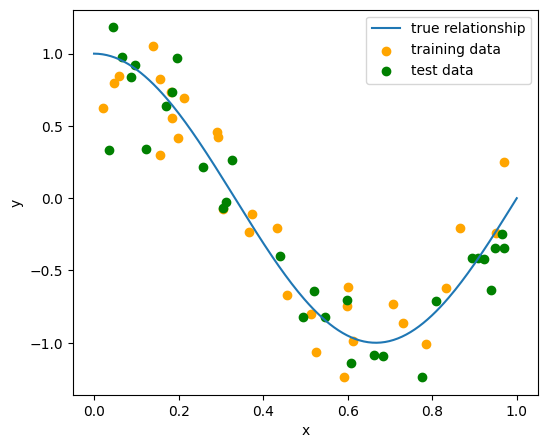

In [2]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.metrics import mean_squared_error

# let us define a true functional relationship which is more complex than a simple linear relationship
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# generate some sample data
np.random.seed(42)

n_samples = 30

# these values are for plotting the function
X_range = np.linspace(0, 1, 200)
# some training and some test data samples
X_train = np.sort(np.random.rand(n_samples))
X_test = np.sort(np.random.rand(n_samples))
y_train = true_fun(X_train) + np.random.randn(n_samples) * 0.25
y_test = true_fun(X_test) + np.random.randn(n_samples) * 0.25

# visualize the relationship
fig, ax = plt.subplots(figsize = (6, 5))
ax.plot(X_range, true_fun(X_range), label = 'true relationship')
plt.scatter(X_train, y_train, label = 'training data', color = 'orange')
ax.scatter(X_test, y_test, label = 'test data', color = 'green')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
plt.show()

To better represent the non-linear relationship, we follow the polynomial regression approach. For comparison, we estimate the traditional linear model and polynomial models with degrees $5$ and $12$. In the graph below, we see the results of these models from left to right, with the $R^2$ for the training and test data included in the caption for each. We can observe that, as expected, the $R^2$ for the linear model is the smallest. This is due to the fact that, except for the two intercepts, the estimated correlation never matches the true correlation and in some cases there are relatively high deviations. However, we also observe the highest $R^2$ for the test data in case of the model with polynomial with degree $q=5$ and not for the more flexible model with degree $q=12$. This is due to the strong fit of the model with degree $q=12$ to the training data, which makes the general relationship less well identified. We can thus state in this example that a slightly more complex model best approximates the true relationship. The reason for this is that the model best balances the effects of deviation from the true relationship and strong goodness of fit to the data. This trade-off is related to the bias-variance trade-off, which we will now briefly discuss in general terms.  

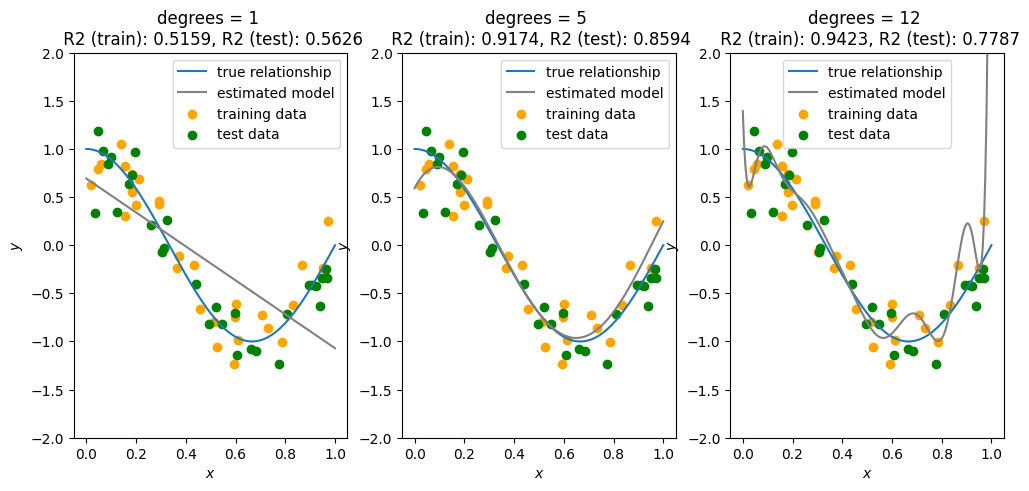

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


def plot_poly_regression(degrees, sklearn_linear_model, main_title, ax = None):
    if ax == None:
        ax = plt.gca()

    polynomial_features = PolynomialFeatures(degree=degrees, include_bias=False)
    X_poly = polynomial_features.fit_transform(X_train.reshape(-1, 1))
    regression_model = sklearn_linear_model
    regression_model.fit(X_poly, y_train)

    ax.plot(X_range, true_fun(X_range), label = 'true relationship')
    ax.plot(X_range, regression_model.predict(polynomial_features.transform(X_range.reshape(-1, 1))), label = 'estimated model', color = 'grey')
    ax.scatter(X_train, y_train, label = 'training data', color = 'orange')
    ax.scatter(X_test, y_test, label = 'test data', color = 'green')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_ylim(-2, 2)
    ax.legend()
    r2_train = r2_score(y_train, regression_model.predict(polynomial_features.transform(X_train.reshape(-1, 1))))
    r2_test = r2_score(y_test, regression_model.predict(polynomial_features.transform(X_test.reshape(-1, 1))))
    ax.set_title(f'{main_title} \n R2 (train): {r2_train:.4f}, R2 (test): {r2_test:.4f}')

    return ax

fig, axs = plt.subplots(1, 3, figsize = (12, 5))
plot_poly_regression(1, LinearRegression(), main_title = f'degrees = {1}', ax = axs[0])
plot_poly_regression(5, LinearRegression(), main_title = f'degrees = {5}', ax = axs[1])
plot_poly_regression(12,LinearRegression(), main_title = f'degrees = {12}', ax = axs[2])
plt.show()

## Bias-Variance Trade-Off

The bias-variance trade-off decomposes the expected deviation between forecast and actual realization of a data point $(\boldsymbol{x}, y)$ into its individual components:

$$
E \left(y - \hat{f} \left( \boldsymbol{x} \right) \right)^2 = Var\left(\hat{f} \left( \boldsymbol{x} \right)\right) + \left[ Bias\left(\hat{f} \left( \boldsymbol{x} \right)\right)\right]^2 + Var\left(\epsilon\right)
$$

Random deviation between realizations and predictions of a model cannot be reduced by choosing the appropriate model or by perfect estimation of the parameters. The contribution of these deviations is given by $Var\left(\epsilon\right)$. This means even if one knows the true relationship and the parameters of the model, deviations of the realizations from the deterministic part of the model always occur due to randomness. 

In reality, however, neither the fitting model nor its parameters are known. When a model is estimated for different samples, different parameter estimates and predictions result each time $\hat{f} \left( \boldsymbol{x} \right)$. This affects the deviation between actual realization and prediction and is given by $Var\left(\hat{f} \left( \boldsymbol{x} \right)\right)$. This means, conditional on the variance, the forecasts with the estimated model are sometimes further and sometimes less far from the true relationship $f \left( \boldsymbol{x} \right)$, depending on the sample. Insofar as these deviations balance out again in the mean, the predictions of the estimated models converge on average to the prediction of the true model. In this case, there are no systematic deviations between $\hat{f} \left( \boldsymbol{x} \right)$ and $f \left( \boldsymbol{x} \right)$. The estimator is said to be unbiased, for which the bias is equal to $0$. 

However, if systematic deviations occur in the expected value between the forecast of the estimated model and the actual relationship, the bias is different from $0$ and is a further source of deviations between the forecast and the actual realization of the model. We summarize, deviations of estimated predictions and the target variable have the following possible causes:

- the randomness of the realization: $\epsilon = y - f\left( \boldsymbol{x} \right)$ $\rightarrow$ pure randomness that we are exposed to
- the variance of the estimated model for different samples $Var\left(\hat{f} \left( \boldsymbol{x} \right)\right)$ $\rightarrow$ statistical uncertainty when collecting data and estimating parameters
- the systematic deviation of the estimated model and the true relationship, the $bias$: $E \left(\hat{f} \left( \boldsymbol{x} \right) - f \left( \boldsymbol{x} \right) \right)$ $\rightarrow$ deviation due model misspecification

Since we do not know the true relationship $f \left( \boldsymbol{x} \right) $ in reality, it is usually also not possible to determine these components individually. Nevertheless, it is important to understand the aforementioned causes of divergence between realization and prediction, since bias and variance of a model can be affected by complexity. Complex models often tend to have a smaller bias, but introduce a higher variance. Accordingly, this must be taken into account when selecting a model in order to ultimately select and train a model that keeps both sources of error as low as possible.